# EDA on general features & after tokenization

## Import data & modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

## Light general exploration

In [4]:
print(df.columns)

Index(['story_id', 'title', 'author', 'contest_num', 'won_contest',
       'num_likes', 'num_comments', 'story_html', 'date_published', 'num_sent',
       'story_sent', 'sent_lengths', 'sent_avg_length', 'sent_words',
       'story_word_toks', 'words', 'punctuation', 'num_words', 'unique_words',
       'num_unique_words', 'unique_words_percent', 'text_str', 'age',
       'words_exist_per_cent', 'num_cats', 'cat_School', 'cat_Creative',
       'cat_Age', 'cat_Happy', 'cat_Thriller', 'cat_Friendship', 'cat_East',
       'cat_Inspirational', 'cat_Christian', 'cat_Bedtime', 'cat_Drama',
       'cat_Horror', 'cat_Lesbian', 'cat_High', 'cat_Science', 'cat_American',
       'cat_Speculative', 'cat_Funny', 'cat_Adventure', 'cat_Nonfiction',
       'cat_African', 'cat_Christmas', 'cat_Teens', 'cat_Fantasy',
       'cat_Holiday', 'cat_Western', 'cat_Young', 'cat_Coming', 'cat_Suspense',
       'cat_Romance', 'cat_Urban', 'cat_Latinx', 'cat_Desi', 'cat_Asian',
       'cat_Black', 'cat_Sad', 'cat_

In [5]:
print('Dataset dimensions:', df.shape)
print('Does the dataset contain NA?', df.isna().any().any())
print('Data types in dataset:')
print(df.dtypes.value_counts())

Dataset dimensions: (18248, 87)
Does the dataset contain NA? True
Data types in dataset:
int64      59
object     16
float64    12
dtype: int64


In [6]:
# missing values
for c in df.columns:
  if df[c].isna().sum(axis=0)>0:
    print(c, df[c].isna().sum(axis=0))

author 2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   story_id                      18248 non-null  object 
 1   title                         18248 non-null  object 
 2   author                        18246 non-null  object 
 3   contest_num                   18248 non-null  int64  
 4   won_contest                   18248 non-null  int64  
 5   num_likes                     18248 non-null  int64  
 6   num_comments                  18248 non-null  int64  
 7   story_html                    18248 non-null  object 
 8   date_published                18248 non-null  object 
 9   num_sent                      18248 non-null  int64  
 10  story_sent                    18248 non-null  object 
 11  sent_lengths                  18248 non-null  object 
 12  sent_avg_length               18248 non-null  float64
 13  s

In [8]:
numerical = ['num_likes', 'num_comments', 'num_sent', 'sent_avg_length', 'num_words', 
             'num_unique_words', 'unique_words_percent', 'age', 'num_cats',
             'shortlisted', 'sentiment_POSITIVE_no_prepro', 
             'sentiment_NEGATIVE_no_prepro', 'sentiment_hf_text',
             'emotion_anger', 'emotion_fear', 'emotion_joy', 'emotion_love', 
             'emotion_sadness', 'emotion_surprise', ]


In [9]:
df[numerical].describe()

,num_likes,num_comments,num_sent,sent_avg_length,num_words,num_unique_words,unique_words_percent,age,num_cats,shortlisted,sentiment_POSITIVE_no_prepro,sentiment_NEGATIVE_no_prepro,sentiment_hf_text,emotion_anger,emotion_fear,emotion_joy,emotion_love,emotion_sadness,emotion_surprise
count,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000,18248.000000
mean,14.138700,4.295758,119.869739,19.325097,1772.493205,653.386234,0.381320,502.618972,2.950460,0.010302,0.659674,0.390804,-0.317295,0.353911,0.197025,0.322536,0.026769,0.090286,0.010222
std,18.742977,17.676338,54.617152,20.474949,663.515601,195.248741,0.053579,160.524603,1.175209,0.100980,0.177446,0.140819,0.948122,0.095069,0.093746,0.103808,0.025684,0.050729,0.013392
min,0.000000,0.000000,1.000000,4.197222,411.000000,187.000000,0.143804,124.000000,1.000000,0.000000,0.090909,0.014925,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,80.000000,14.865331,1191.000000,494.000000,0.343355,430.000000,2.000000,0.000000,0.547368,0.307585,-1.000000,0.289474,0.129310,0.250000,0.009050,0.054209,0.000000
50%,10.000000,1.000000,108.000000,17.545455,1569.000000,607.000000,0.380890,518.000000,3.000000,0.000000,0.666667,0.341772,-1.000000,0.352941,0.185265,0.313901,0.020619,0.082070,0.007463
75%,14.000000,3.000000,151.000000,20.960132,2265.000000,793.000000,0.417809,621.000000,3.000000,0.000000,0.750000,0.500000,1.000000,0.416412,0.253185,0.386872,0.038144,0.116902,0.015385
max,503.000000,629.000000,414.000000,1459.000000,4620.000000,1507.000000,0.638215,1154.000000,8.000000,1.000000,1.000000,0.909091,1.000000,0.949153,0.673469,1.000000,0.315789,0.500000,0.500000


In [10]:
with pd.option_context('display.max_rows', 1, 'display.max_columns', None): 
    display(df.sample(1))

,story_id,title,author,contest_num,won_contest,num_likes,num_comments,story_html,date_published,num_sent,story_sent,sent_lengths,sent_avg_length,sent_words,story_word_toks,words,punctuation,num_words,unique_words,num_unique_words,unique_words_percent,text_str,age,words_exist_per_cent,num_cats,cat_School,cat_Creative,cat_Age,cat_Happy,cat_Thriller,cat_Friendship,cat_East,cat_Inspirational,cat_Christian,cat_Bedtime,cat_Drama,cat_Horror,cat_Lesbian,cat_High,cat_Science,cat_American,cat_Speculative,cat_Funny,cat_Adventure,cat_Nonfiction,cat_African,cat_Christmas,cat_Teens,cat_Fantasy,cat_Holiday,cat_Western,cat_Young,cat_Coming,cat_Suspense,cat_Romance,cat_Urban,cat_Latinx,cat_Desi,cat_Asian,cat_Black,cat_Sad,cat_Kids,cat_People,cat_Color,cat_Fiction,cat_Contemporary,cat_Mystery,cat_Adult,cat_Transgender,cat_Historical,cat_Middle,cat_Gay,cat_Indigenous,cat_Crime,shortlisted,sentiment_POSITIVE_no_prepro,sentiment_NEGATIVE_no_prepro,sentiment_hf_text,emotion_all,emotion_anger,emotion_fear,emotion_joy,emotion_love,emotion_sadness,emotion_surprise,lemmatized_parag,text_str_lem
8909,qsrre0,Capture,Meggysa Nine,81,0,7,0,"<article class=""font-alt submission-content sp...",2021-02-17 05:18:00,61,"[""\nThirteen hundred — that's how my ex-milita...",[39 12 22 31 16 8 10 24 15 7 16 34 29 15 22 ...,19.032787,"[list(['Thirteen', 'hundred', '—', 'that', ""'s...","['Thirteen', 'hundred', '—', 'that', ""'s"", 'ho...",['Thirteen' 'hundred' 'that' ... 'she' 'softly...,['—' '—' '.' '.' '.' '.' '.' '.' '.' '.' '.' '...,1063,"{'from', 'The', 'polaroids', 'uttered', 'beaut...",452,0.425212,\nThirteen hundred — that's how my ex-military...,595,93.023256,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.957447,0.042553,-1.0,"['joy', 'joy', 'joy', 'joy', 'sadness', 'fear'...",0.180328,0.180328,0.52459,0.04918,0.04918,0.016393,"['', ' thirteen hundred — that be how -PRON- e...",\n thirteen hundred — that be how -PRON- ex - ...


## Distributions

Distribution of numerical features:

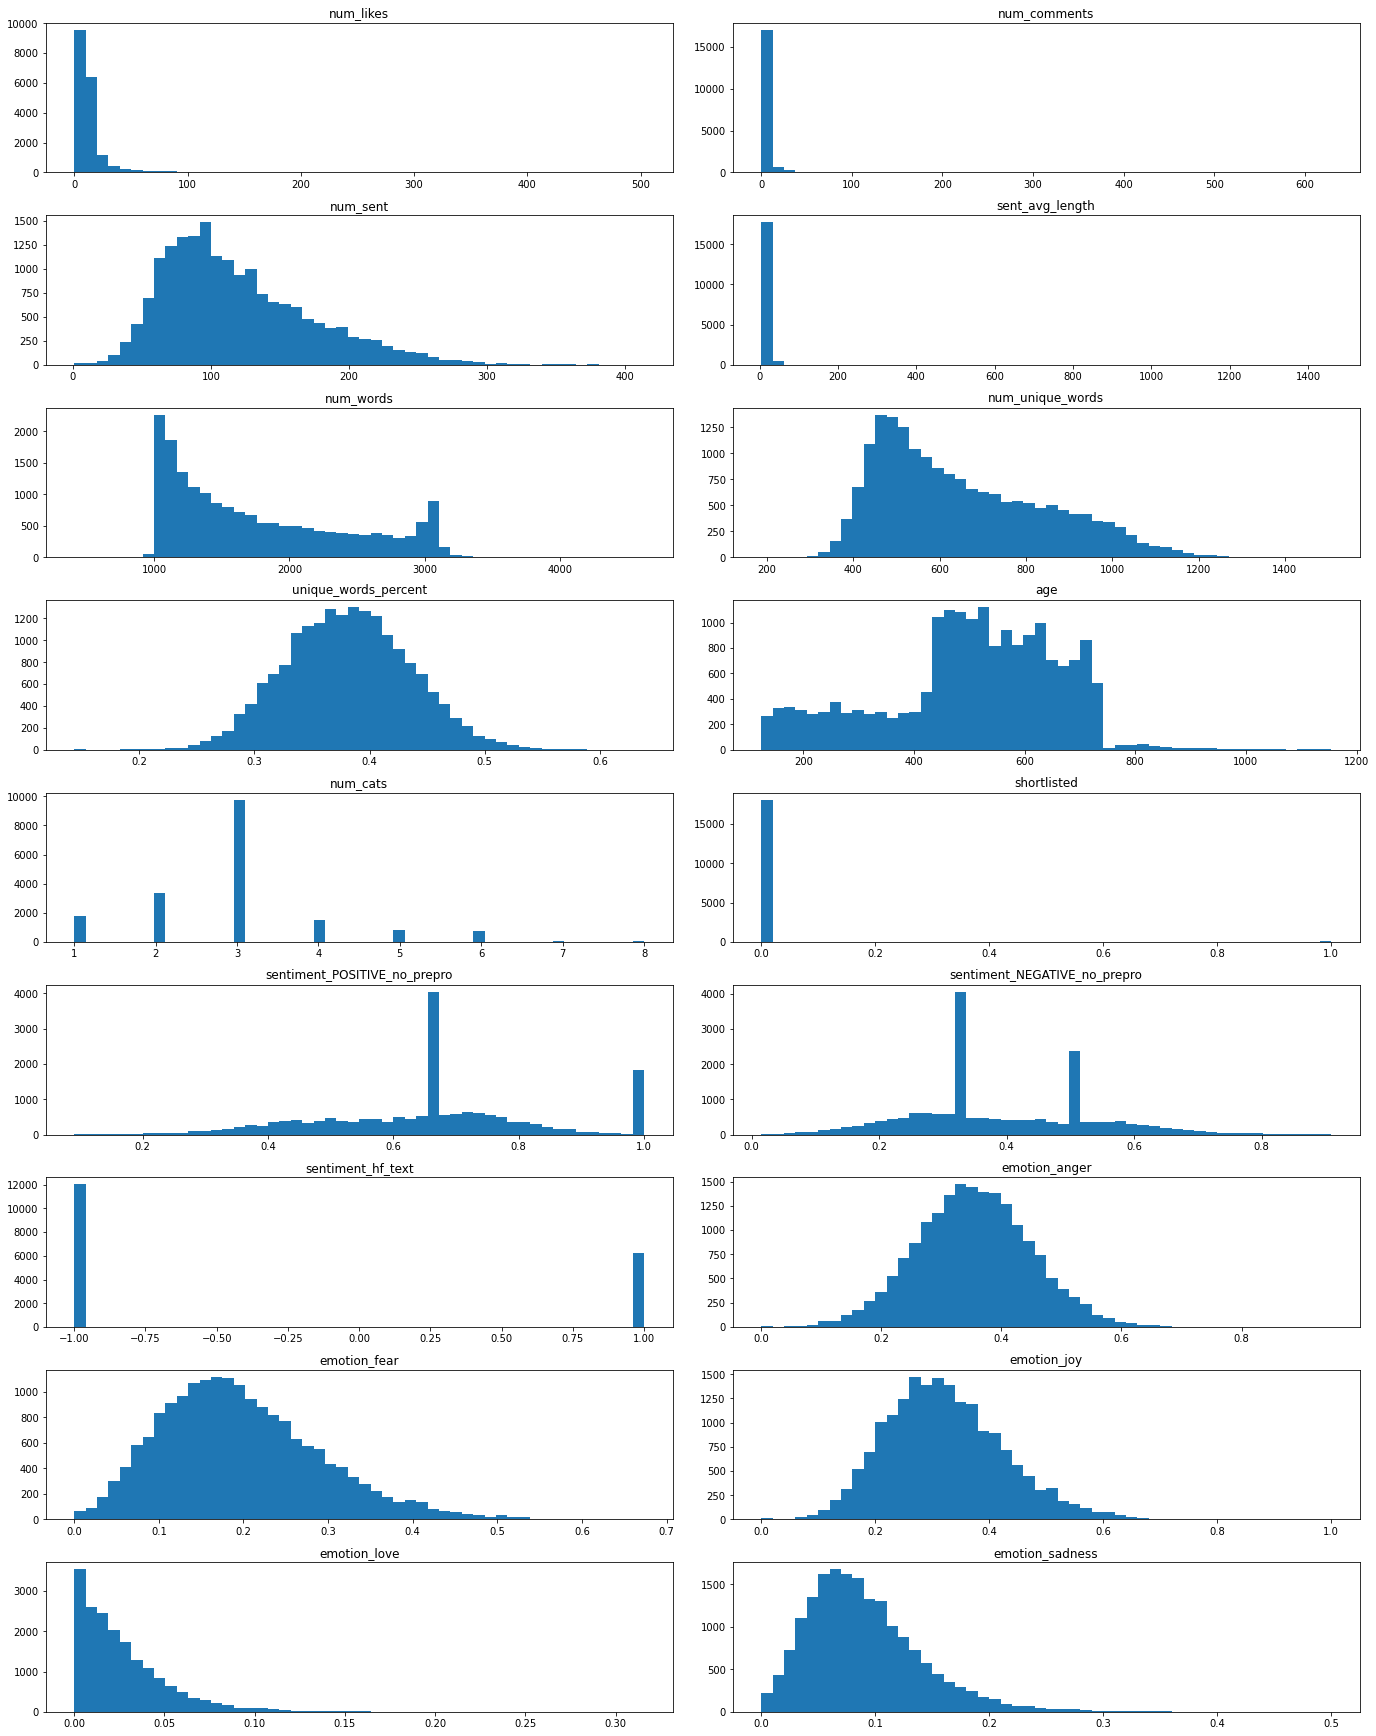

In [11]:
my_j = int(len(numerical)/2)
f,ax=plt.subplots(my_j,2, figsize=(19,24), constrained_layout = True)
feat_iter=iter(numerical)
for i in range(my_j):
    for j in range(2):
      try:
        x = next(feat_iter)
        ax[i,j].hist(df[x], bins=50)
        ax[i,j].set_title(x)
      except StopIteration:
          pass

Distribution of target

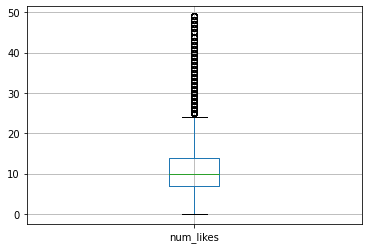

In [12]:
threshold = 50
df[df.num_likes<threshold].boxplot(column='num_likes')

Distribution of categorical features:

In [13]:
categories = [col for col in df if col.startswith('cat')]
categories.remove('cat_Fiction')
# for cat in categories:
#   df.boxplot(column='num_likes', by=cat, vert=False)
#   plt.title(f'num_likes distribution per {cat}')
#   plt.suptitle('')
#   plt.show()

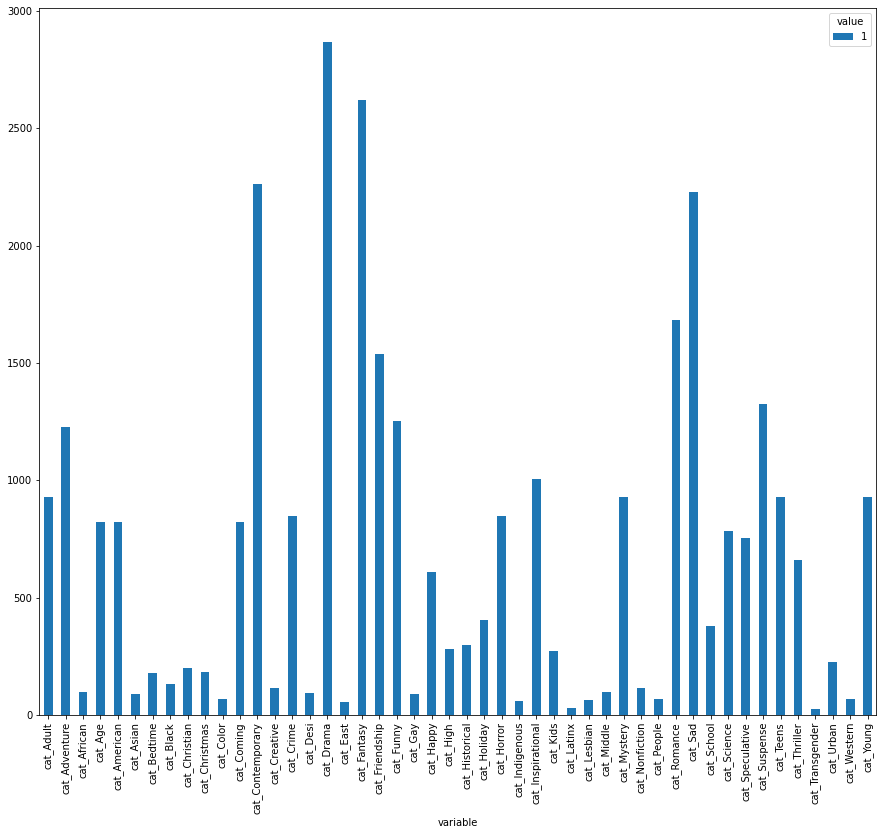

In [14]:
dfm = df[categories].melt()
dfm = dfm[dfm.value==1]
plot_df = (
    pd.crosstab(dfm['variable'], dfm['value'])
)
plot_df.plot.bar(figsize=(15,13))
# plt.tight_layout()
# plt.show()


In [15]:
target = 'num_likes'

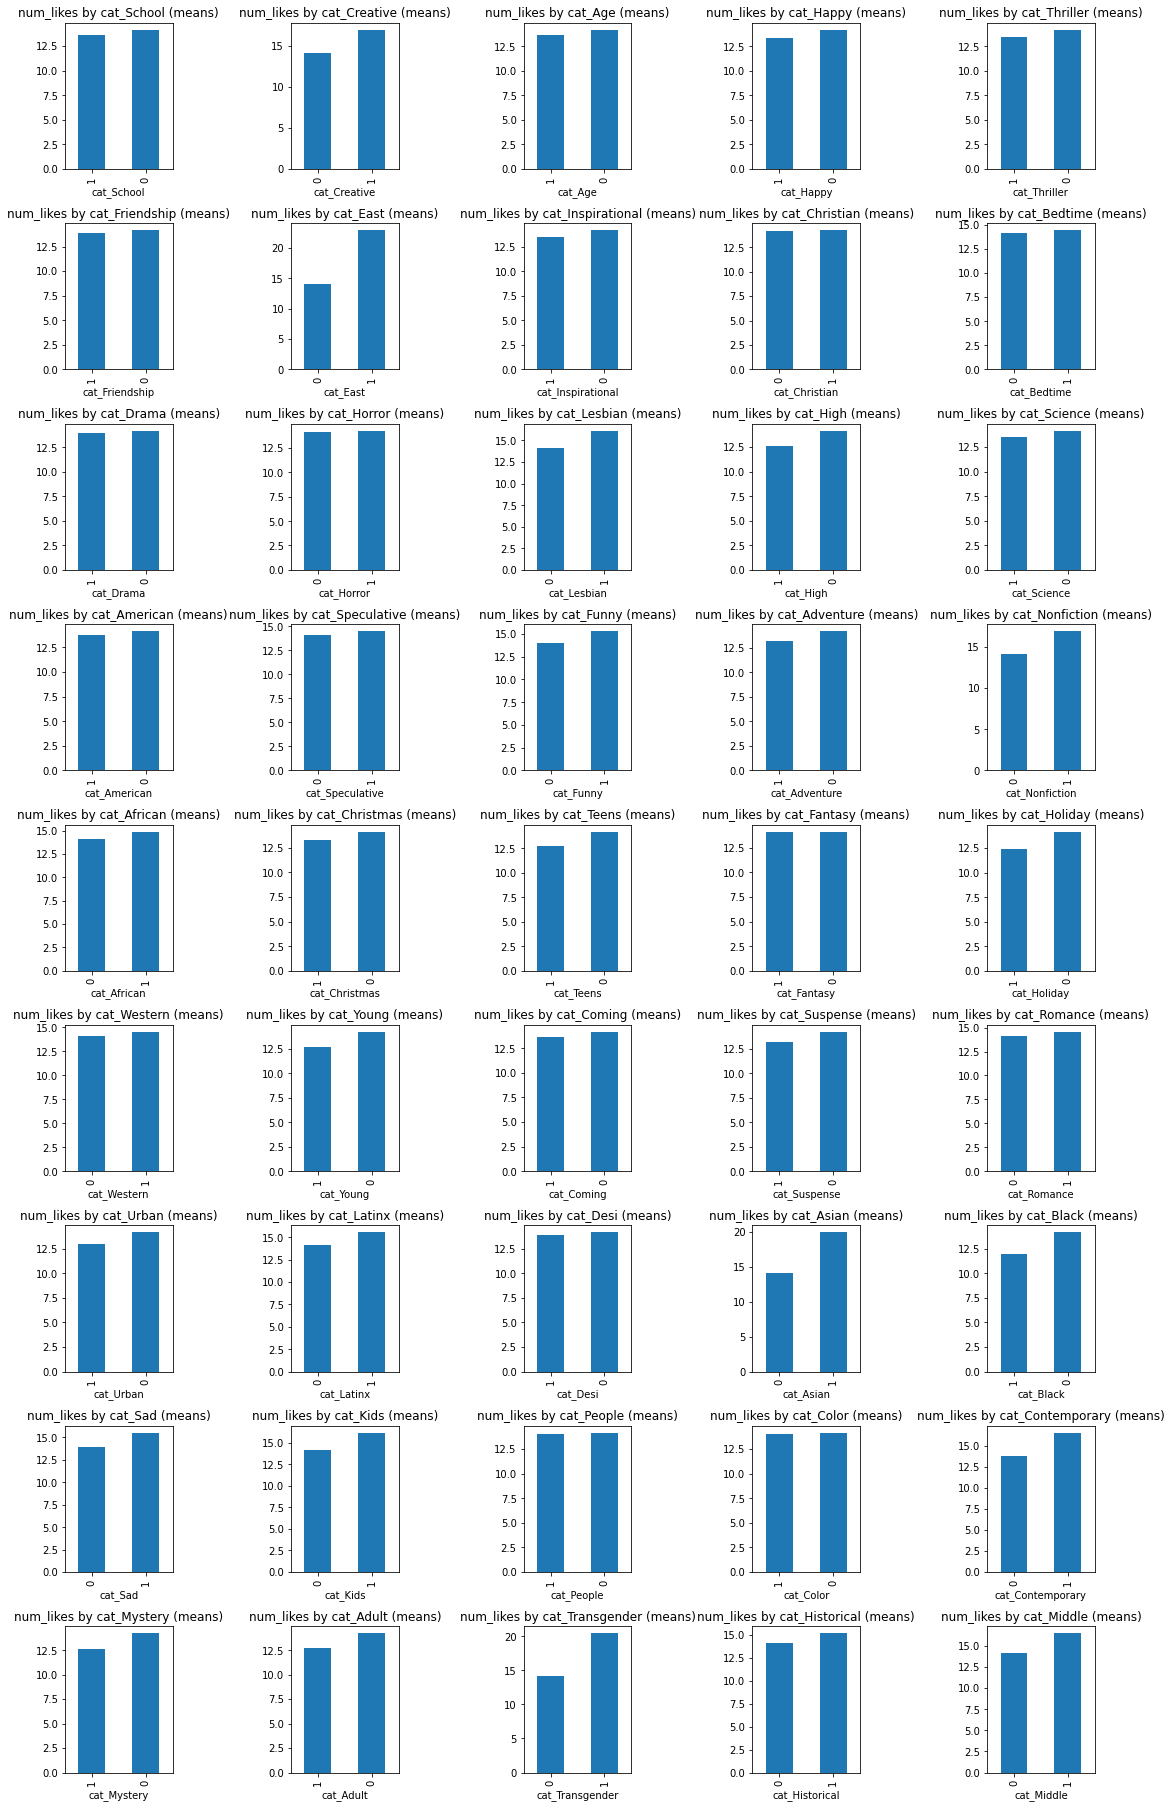

In [16]:
my_j = int(len(categories)/5)

f,ax=plt.subplots(my_j,
                  5, 
                  figsize=(16,25), 
                  constrained_layout = True)
feat_iter=iter(categories)

for i in range(my_j):
    for j in range(5):
      try:
        x = next(feat_iter)
        df.groupby(x)[target].mean().sort_values().plot.bar(ax=ax[i,j])
        ax[i,j].set_title(f"{target} by {x} (means)")
      except StopIteration:
          pass

## Against target

Correlation of numerical features with target

In [18]:
target = 'num_likes'
threshold = 400
print('Pearson correlation:')
for my_var in numerical:
  print(my_var ,'= ', df[df.num_likes<threshold][my_var].corr(df[df.num_likes<threshold][target]))

Pearson correlation:
num_likes =  1.0
num_comments =  0.6513481714797659
num_sent =  -0.0019137670513435028
sent_avg_length =  0.02518223044691615
num_words =  0.013323691905360023
num_unique_words =  0.0296463460519612
unique_words_percent =  0.029235916357279984
age =  -0.02145681608332524
num_cats =  -0.006931574871593074
shortlisted =  0.1299273756693547
sentiment_POSITIVE_no_prepro =  0.06609148105097301
sentiment_NEGATIVE_no_prepro =  -0.008973632169001294
sentiment_hf_text =  -0.011688029337172876
emotion_anger =  0.022198006033359797
emotion_fear =  -0.011020410660537643
emotion_joy =  -0.02980074611343543
emotion_love =  0.01545099255006402
emotion_sadness =  0.030522005256107314
emotion_surprise =  -0.016438644040757983


In [19]:
print('spearman correlation:')
for my_var in numerical:
  print(my_var ,'= ', df[df.num_likes<threshold][my_var].corr(df[df.num_likes<threshold][target], method='spearman'))

spearman correlation:
num_likes =  1.0
num_comments =  0.5263455765956184
num_sent =  0.014698769783223473
sent_avg_length =  0.03482459631410506
num_words =  0.03222692664283464
num_unique_words =  0.058881608202076725
unique_words_percent =  0.0337470483528916
age =  -0.18518706978145094
num_cats =  0.04040574922680849
shortlisted =  0.15113157724460907
sentiment_POSITIVE_no_prepro =  0.06118156064190844
sentiment_NEGATIVE_no_prepro =  0.006470043665466252
sentiment_hf_text =  -0.011335113864840573
emotion_anger =  0.03291808670358443
emotion_fear =  0.014230449420151179
emotion_joy =  -0.03017725003173332
emotion_love =  0.004371964597941588
emotion_sadness =  -0.012967509225418287
emotion_surprise =  -0.014411425190304137


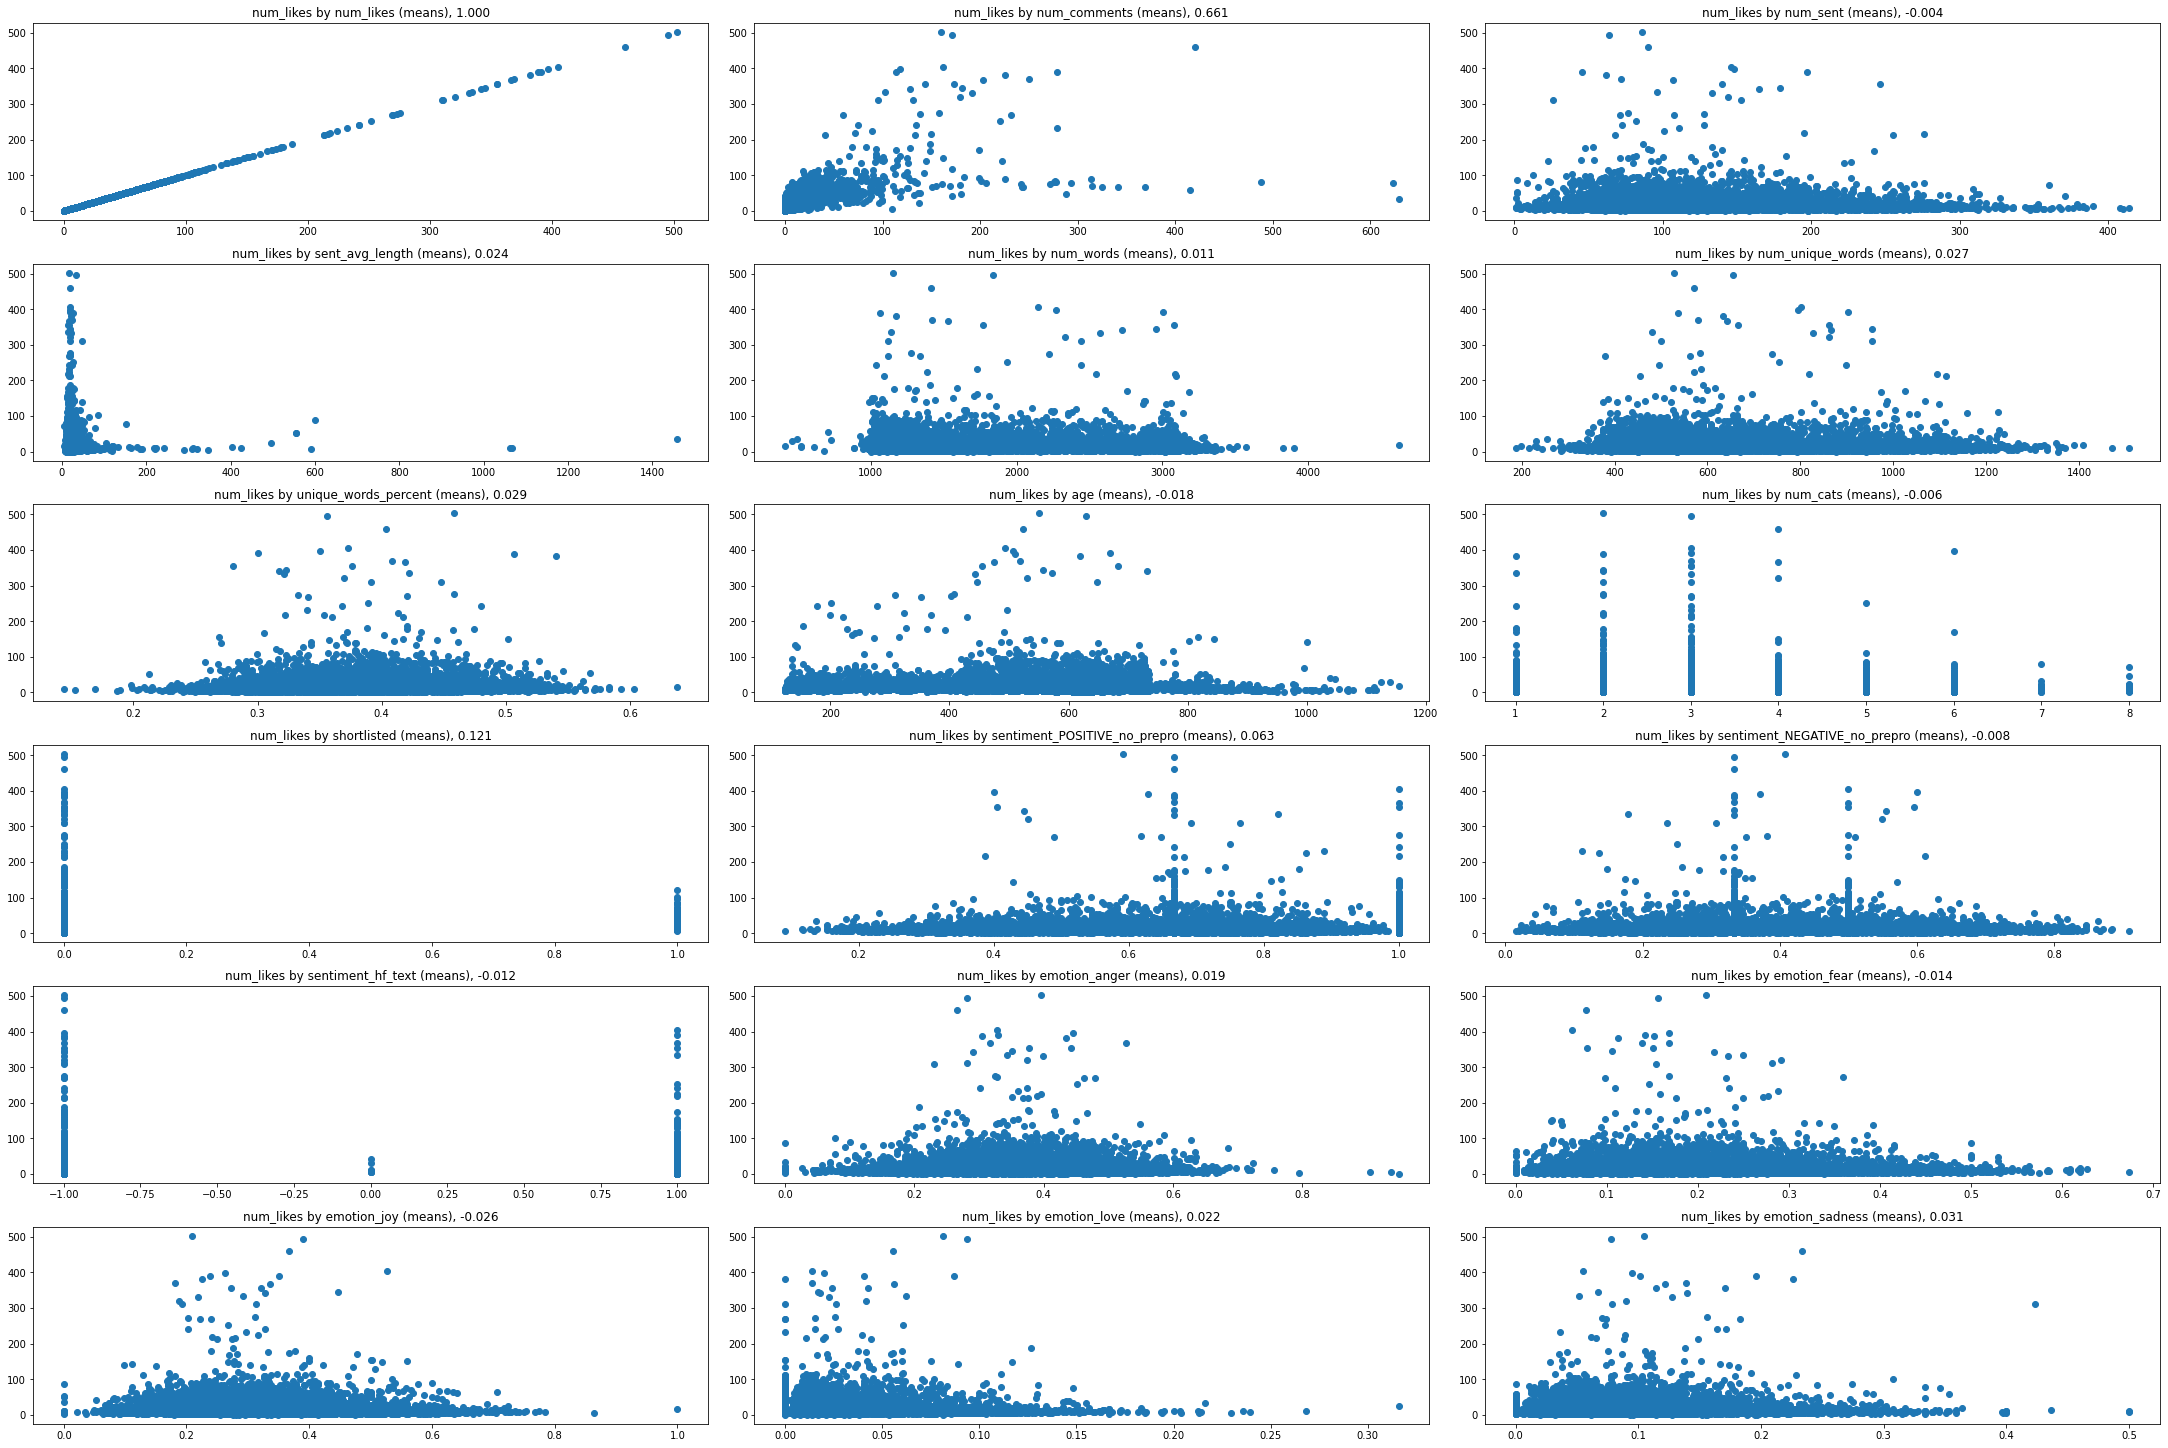

In [20]:
target = 'num_likes'
my_j = int(len(numerical)/3)

f,ax=plt.subplots(my_j,
                  3, 
                  figsize=(30,20), 
                  constrained_layout = True)
feat_iter=iter(numerical)

for i in range(my_j):
    for j in range(3):
      try:
        x = next(feat_iter)
        ax[i,j].scatter(df[x], df[target])
        ax[i,j].set_title(f"{target} by {x} (means), {df[x].corr(df[target]):.3f}")
      except StopIteration:
          pass

Number of likes is our target, so it should be highly correlated with itself (threshold is offset).

Number of comments, as suspected, is highly correlated as well.

The length of the story doesn't seem to have much of a linear correlation with the target.

## Correlation between features

In [21]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df[numerical].corr(method='spearman')
df_styled = corr.style.applymap(color_map)
df_styled

,num_likes,num_comments,num_sent,sent_avg_length,num_words,num_unique_words,unique_words_percent,age,num_cats,shortlisted,sentiment_POSITIVE_no_prepro,sentiment_NEGATIVE_no_prepro,sentiment_hf_text,emotion_anger,emotion_fear,emotion_joy,emotion_love,emotion_sadness,emotion_surprise
num_likes,1.000000,0.526676,0.014530,0.034972,0.032202,0.058896,0.033854,-0.185023,0.040446,0.151043,0.061249,0.006508,-0.011404,0.032731,0.013925,-0.029984,0.004760,-0.012835,-0.014640
num_comments,0.526676,1.000000,0.041965,0.015552,0.051301,0.080328,0.032997,-0.050492,0.002715,0.151444,0.075447,-0.003625,-0.002175,0.019247,-0.000376,-0.024291,0.025842,0.018006,-0.011030
num_sent,0.014530,0.041965,1.000000,-0.514040,0.773622,0.688643,-0.577543,-0.033813,0.023202,0.020685,-0.126859,0.085464,-0.039797,0.223278,0.102939,-0.133884,-0.050217,-0.122666,0.032273
sent_avg_length,0.034972,0.015552,-0.514040,1.000000,0.082917,0.144867,0.067392,-0.029068,0.002768,0.008496,0.097134,-0.000397,0.023472,-0.252795,-0.035236,0.138882,0.078487,0.104596,0.083465
num_words,0.032202,0.051301,0.773622,0.082917,1.000000,0.924511,-0.650064,-0.056722,0.031783,0.024790,-0.067423,0.092059,-0.023862,0.066988,0.101138,-0.061090,0.002510,-0.055971,0.105066
num_unique_words,0.058896,0.080328,0.688643,0.144867,0.924511,1.000000,-0.344752,-0.087204,0.029242,0.039641,-0.048044,0.093988,-0.023189,0.033726,0.143017,-0.062350,0.030117,-0.055906,0.082973
unique_words_percent,0.033854,0.032997,-0.577543,0.067392,-0.650064,-0.344752,1.000000,-0.028783,-0.015913,0.019242,0.070274,-0.042406,0.012544,-0.086852,0.026992,0.026578,0.044884,0.018621,-0.094321
age,-0.185023,-0.050492,-0.033813,-0.029068,-0.056722,-0.087204,-0.028783,1.000000,0.040243,-0.022633,0.001371,-0.004923,0.021850,-0.001808,-0.061036,0.040988,-0.008636,0.008120,0.007122
num_cats,0.040446,0.002715,0.023202,0.002768,0.031783,0.029242,-0.015913,0.040243,1.000000,-0.034542,0.010849,-0.020194,-0.000987,0.016729,-0.007930,0.002018,-0.018495,-0.015972,0.021419
shortlisted,0.151043,0.151444,0.020685,0.008496,0.024790,0.039641,0.019242,-0.022633,-0.034542,1.000000,0.004150,-0.002546,-0.016241,-0.000450,0.012636,-0.006433,-0.004831,0.017965,-0.007251
